# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [1]:
import time
import warnings
import functools
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
# 設定 2D 樣板資料
n_samples, random_state = 1500, 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

# 設定群集與繪圖參數 (dataset, n_clusters,)
dataset_pairs = ((noisy_moons, 2,), (blobs, 3,), (no_structure, 3,),)

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

In [3]:
# 執行各種樣板資料的繪圖迴圈
def make_toy_datasets_plot(dataset_pairs):
    plot_num = 1
    plt.figure(figsize=(10, 8,))
    for dataset, n_clusters in dataset_pairs:
        X = StandardScaler().fit_transform(dataset[0])
        name_clusterer_pairs = make_name_clusterer_pairs(n_clusters)
        for name, clusterer in name_clusterer_pairs:
            plt.subplot(len(dataset_pairs), len(name_clusterer_pairs), plot_num)
            make_toy_dataset_plot(X, name, clusterer, show_title=((plot_num - 1) // 3 == 0))
            plot_num += 1
    plt.show()

# 繪製樣板圖形
def make_toy_dataset_plot(X, name, clusterer, show_title=False):
    elapsed_time = '{:.2f}s'.format(make_elapsed_time(lambda: clusterer.fit(X))[1]).lstrip('0')
    y_pred = clusterer.labels_.astype(np.int)
    colors = make_colors(int(max(y_pred) + 1))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    plt.text(.99, .01, elapsed_time, size=15, transform=plt.gca().transAxes, horizontalalignment='right')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    if show_title:
        plt.title(name, size=18)    

# 取得三種不同參數的 Hierarchical clustering
def make_name_clusterer_pairs(n_clusters):
    return (('Ward Linkage', AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),),
            ('Average Linkage', AgglomerativeClustering(n_clusters=n_clusters, linkage='average'),),
            ('Complete Linkage', AgglomerativeClustering(n_clusters=n_clusters, linkage='complete'),),)

# 取得經過時間
def make_elapsed_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    return result, time.time() - start_time        

# 取得顏色陣列
def make_colors(length):
    color_codes = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
    return np.array(list(islice(cycle(color_codes), length)))

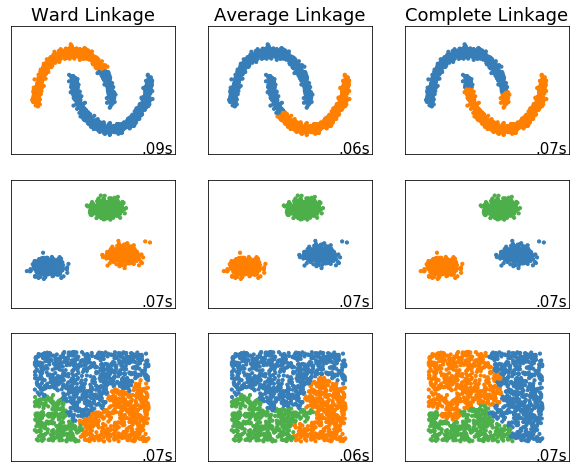

In [4]:
make_toy_datasets_plot(dataset_pairs)